<a href="https://colab.research.google.com/github/19K41A04G6/AI/blob/main/Assignment6_4G6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import math as mt
import random
import pandas as pd

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ai 4')
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [5]:
data['X']

0     7.6
1     7.1
2     8.2
3     7.5
4     7.4
5     7.8
6     7.3
7     8.0
8     7.1
9     7.5
10    8.1
11    7.0
12    7.3
13    7.8
14    7.3
15    8.0
16    8.5
17    7.1
18    8.2
19    7.9
20    7.6
21    8.8
22    7.2
23    7.9
24    8.1
25    7.7
26    8.4
27    7.4
28    7.3
29    8.5
30    7.8
31    6.7
32    7.1
33    7.3
Name: X, dtype: float64

In [6]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

In [7]:
sample_outliers_X = detect_outliers_zscore(data['X'])
sample_outliers_Y = detect_outliers_zscore(data['Y'])
print("Outliers in X column from Z-scores method: ", sample_outliers_X)
print("Outliers in Y column from Z-scores method: ", sample_outliers_Y)

Outliers in X column from Z-scores method:  []
Outliers in Y column from Z-scores method:  []


In [8]:
from scipy.stats import zscore
zX = np.abs(zscore(data['X']))
zY = np.abs(zscore(data['Y']))
data['ZscoreX'] = zX
data['ZscoreY'] = zY
outliers_X=len(data[data['ZscoreX']>3])
outliers_Y=len(data[data['ZscoreY']>3])
data_z = data[data['ZscoreX']<3]
data=data_z.drop(['ZscoreX', 'ZscoreY'], axis=1)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [9]:
print(data.isnull().sum())

X    0
Y    0
dtype: int64


In [10]:
m1=data['X'].mean()
m2=data['Y'].mean()
data['X'].fillna(value=m1, inplace=True)
data['Y'].fillna(value=m2, inplace=True)
data

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.20, random_state = 10)

In [12]:
m1=random.uniform(-10,10)
m2=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.0001
max_iter=100000

In [13]:
def gradient(m1,m2,c,x,y):
  m1_deriv=-1*(y-m1*x*x-m2*x-c)*x*x
  m2_deriv=-1*(y-m1*x*x-m2*x-c)*x
  c_deriv=-1*(y-m1*x*x-m2*x-c)
  return m1_deriv,m2_deriv,c_deriv

In [14]:
for iter in range(max_iter):
  for sample in range(x_train.shape[0]):
    del_m1,del_m2,del_c=gradient(m1, m2, c, x_train.iloc[sample], y_train.iloc[sample])
    m1=m1-eta*del_m1
    m2=m2-eta*del_m2
    c=c-eta*del_c
print('model parameter m1, m2 and c',m1,m2,c)

model parameter m1, m2 and c -6.6388689913000745 69.12748375765437 2.780057328497964


In [15]:
y_pred_train = []
for i in x_train:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_train.append(y_p_tr)
y_pred_train = np.array(y_pred_train)

In [16]:
y_pred_test = []
for i in x_test:
  y_p_tr = (m1 * i*i)+(m2 * i) + c
  y_pred_test.append(y_p_tr)
y_pred_test = np.array(y_pred_test)

In [17]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 48.649534643486234
Mean square error 2366.777221027767
Mean absolute error 42.5107590972013


In [18]:
#Testing Accuracies
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse)
mse = mt.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse)  
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Mean square error 3821.879907450461
Root mean square error 61.82135478498074
Mean absolute error 52.75190655114174


In [19]:
x=input("Enter value of input")
estimation=m1*float(x)*float(x)+m2*float(x)+c
print("estimated output:",estimation)

Enter value of input9.2
estimated output: 76.83903647527997


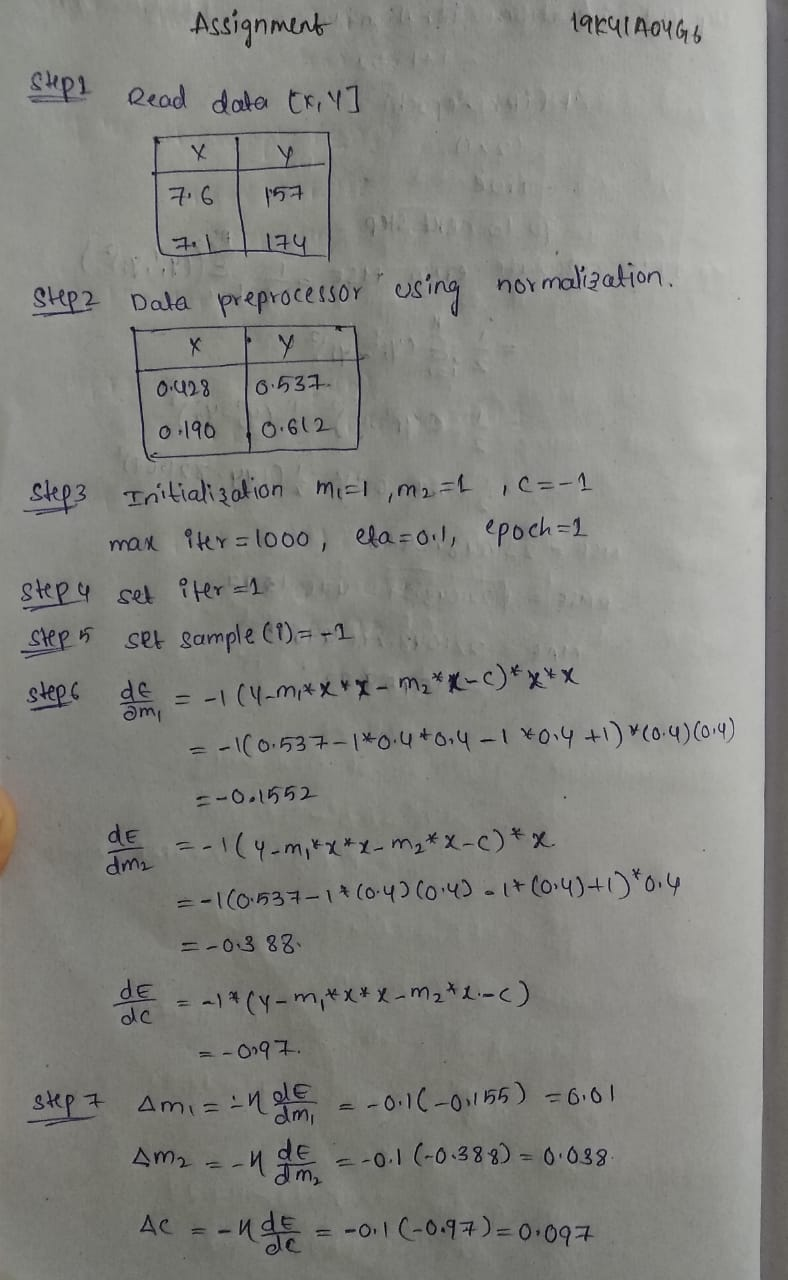

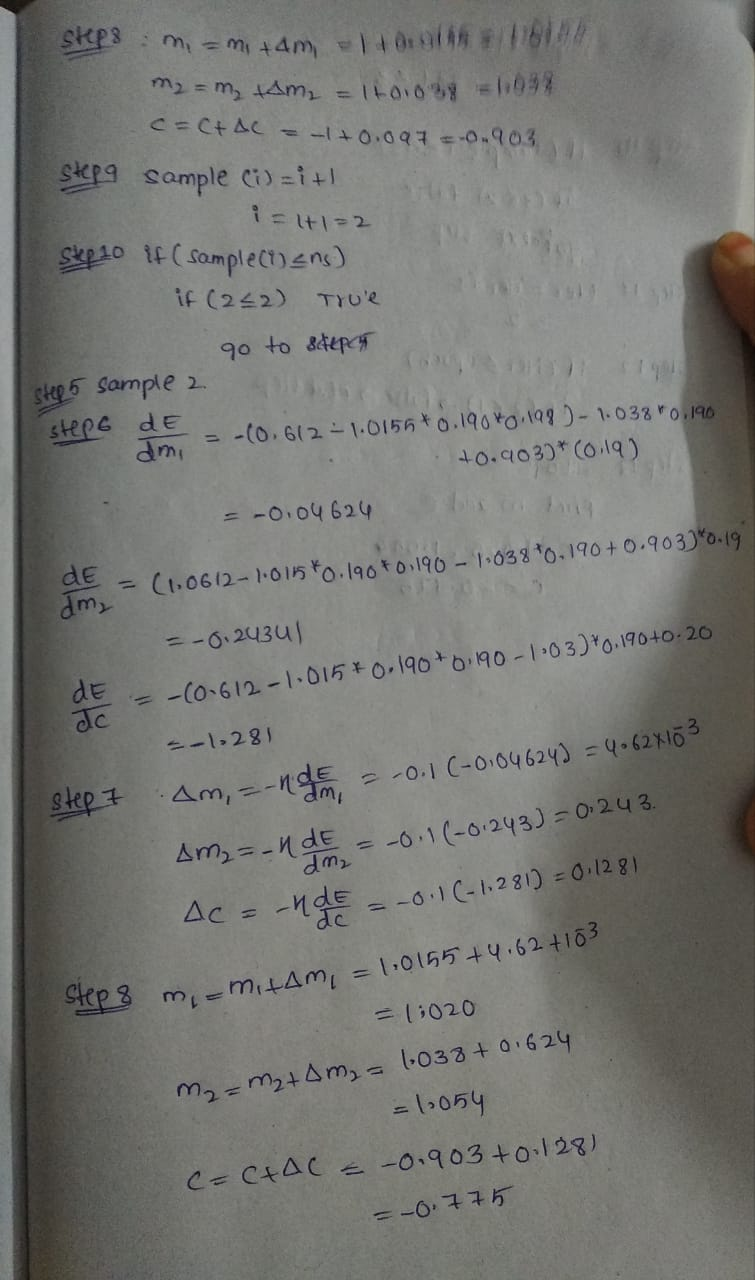

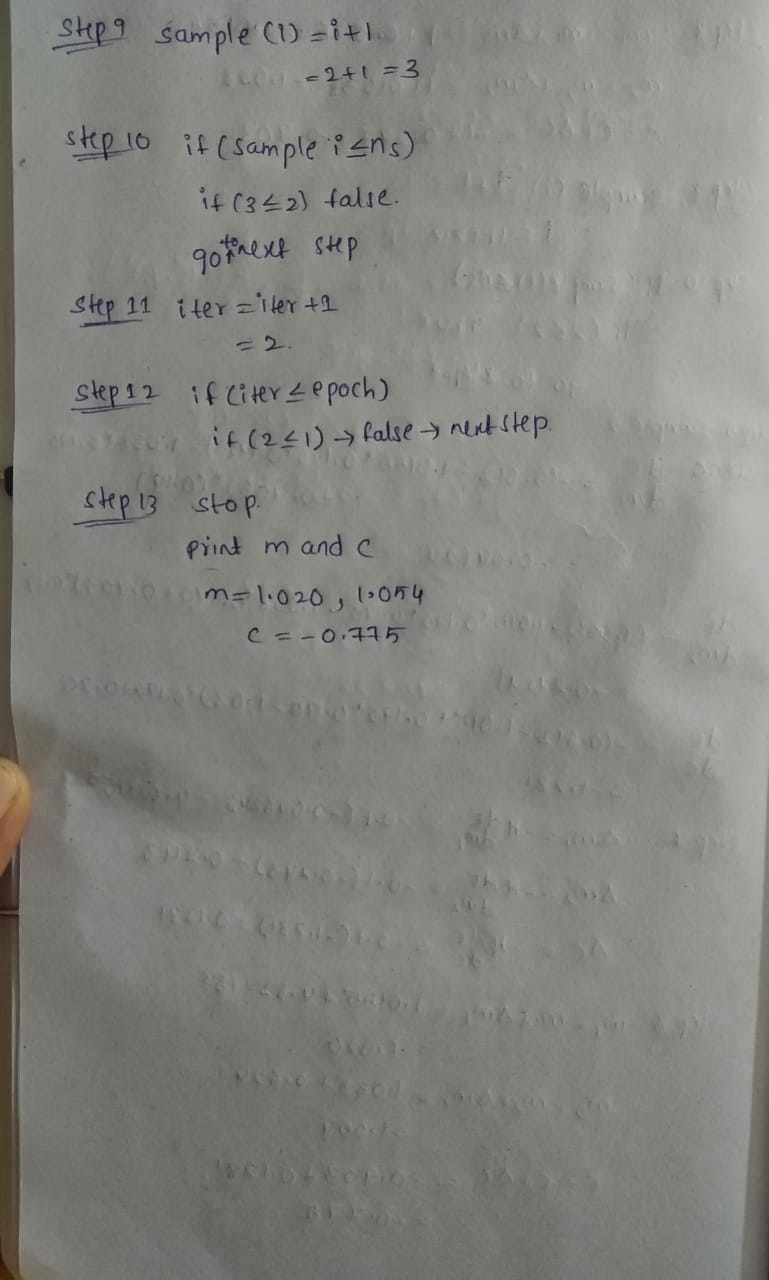